In [1]:
from nltk import FreqDist, classify, NaiveBayesClassifier

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#!conda install nltk -y

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
import pandas as pd

#### TRANSCRIPTS

In [5]:
amazon_transcript = pd.read_csv('data/Amazon/AMAZON_Transcripts.csv')
tesla_transcript = pd.read_csv('data/Tesla/TESLA_Transcripts.csv')
blackrock_transcript = pd.read_csv('data/BlackRock/BLACKROCK_Transcripts.csv')

In [6]:
amazon_transcript_date = pd.read_csv('data/amazon_T.csv')

In [7]:
tesla_transcript_date = pd.read_csv('data/tesla_T.csv')

In [8]:
blackrock_transcript_date = pd.read_csv('data/blackrock_T.csv')

#### STOCK PRICES

In [9]:
tesla_stock = pd.read_csv('data/stocks/TSLA.csv')
blackrock_stock = pd.read_csv('data/stocks/BLK.csv')
amazon_stock = pd.read_csv('data/stocks/AMZN.csv')
nasdaq_stock = pd.read_csv('data/stocks/^IXIC.csv')
s_p_stock = pd.read_csv('data/stocks/^GSPC.csv')
s_p_stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2708700000
1,2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,3799120000
2,2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,2002.609985,4460110000
3,2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,2025.900024,3805480000
4,2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,2062.139893,3934010000
...,...,...,...,...,...,...,...
1436,2020-09-16,3411.229980,3428.919922,3384.449951,3385.489990,3385.489990,4710030000
1437,2020-09-17,3346.860107,3375.169922,3328.820068,3357.010010,3357.010010,4371940000
1438,2020-09-18,3357.379883,3362.270020,3292.399902,3319.469971,3319.469971,7068700000
1439,2020-09-21,3285.570068,3285.570068,3229.100098,3281.060059,3281.060059,4828350000


In [10]:
amazon_transcript= amazon_transcript[['date','Quarter','text']]
blackrock_transcript= blackrock_transcript[['date','Quarter','text']]
tesla_transcript= tesla_transcript[['date','Quarter','text']]

In [11]:
def change_date_format(data_f):
    data_f['date']=pd.to_datetime(data_f['date'])
    return data_f

In [12]:
tesla_transcript = change_date_format(tesla_transcript)
amazon_transcript = change_date_format(amazon_transcript)
blackrock_transcript = change_date_format(blackrock_transcript)

In [13]:
tesla_transcript['focused_date'] = tesla_transcript['date'] + pd.DateOffset(1)
blackrock_transcript['focused_date'] = blackrock_transcript['date'] + pd.DateOffset(1)
amazon_transcript['focused_date'] = amazon_transcript['date'] + pd.DateOffset(1)

In [14]:
tesla_transcript

,date,Quarter,text,focused_date
0,2020-07-22,Q2,"Tesla, Inc. (NASDAQ:TSLA) Q2 2020 Earnings Con...",2020-07-23
1,2020-04-29,Q1,"Tesla, Inc. (NASDAQ:TSLA) Q1 2020 Earnings Con...",2020-04-30
2,2020-01-29,Q4,"Tesla, Inc. (NASDAQ:TSLA) Q4 2019 Earnings Con...",2020-01-30
3,2019-10-23,Q3,"Tesla, Inc. (NASDAQ:TSLA) Q3 2019 Earnings Con...",2019-10-24
4,2019-07-24,Q2,"Tesla, Inc. (NASDAQ:TSLA) Q2 2019 Earnings Con...",2019-07-25
5,2019-04-24,Q1,"Tesla, Inc (NASDAQ:TSLA) Q1 2019 Earnings Conf...",2019-04-25
6,2019-01-30,Q4,"Tesla, Inc. (NASDAQ:TSLA) Q4 2018 Earnings Con...",2019-01-31
7,2018-10-24,Q3,Tesla Inc. (NASDAQ:TSLA) Q3 2018 Earnings Conf...,2018-10-25
8,2018-08-01,Q2,"Tesla, Inc. (NASDAQ:TSLA) Q2 2018 Earnings Cal...",2018-08-02
9,2018-05-02,Q1,"Tesla, Inc. (NASDAQ:TSLA) Q1 2018 Earnings Cal...",2018-05-03


In [15]:
tesla_transcript['focused_price'] =  tesla_transcript_date['focused_price']
tesla_transcript['next_focused_date'] =  tesla_transcript_date['next_focused_date']
tesla_transcript['next_price'] =  tesla_transcript_date['next_price']
#tesla_transcript = tesla_transcript.drop(['Unnamed: 0'], axis=1)

blackrock_transcript['focused_price'] =  blackrock_transcript_date['focused_price']
blackrock_transcript['next_focused_date'] =  blackrock_transcript_date['next_focused_date']
blackrock_transcript['next_price'] =  blackrock_transcript_date['next_price']
#blackrock_transcript = blackrock_transcript.drop(['Unnamed: 0'], axis=1)

amazon_transcript['focused_price'] = amazon_transcript_date['focused_price']
amazon_transcript['next_focused_date'] =  amazon_transcript_date['next_focused_date']
amazon_transcript['next_price'] =  amazon_transcript_date['next_price']
#amazon_transcript = amazon_transcript.drop(['Unnamed: 0'], axis=1)

In [16]:
tesla_transcript.columns

Index(['date', 'Quarter', 'text', 'focused_date', 'focused_price',
       'next_focused_date', 'next_price'],
      dtype='object')

In [17]:
amazon_transcript1=amazon_transcript.iloc[1:].copy()
blackrock_transcript1=blackrock_transcript.iloc[1:].copy()
tesla_transcript1=tesla_transcript.iloc[1:].copy()

In [18]:
#blackrock_transcript=blackrock_transcript[['date', 'Quarter', 'text', 'focused_date', 'focused_price','next_focused_date', 'next_price']]

In [19]:
data=pd.concat([blackrock_transcript1,amazon_transcript1],axis=0)

In [20]:
data=pd.concat([data,tesla_transcript1],axis=0)
data

,date,Quarter,text,focused_date,focused_price,next_focused_date,next_price
1,2020-04-16,Q1,"BlackRock, Inc. (NYSE:BLK) 2020-04-16 Q1 2020 ...",2020-04-17,476.320007,2020-07-16,565.299988
2,2020-01-15,Q4,BlackRock Inc. (NYSE:BLK) 2020-01-15 Q4 2019 E...,2020-01-16,536.909973,2020-04-15,442.48999
3,2019-10-15,Q3,"BlackRock, Inc. (NYSE:BLK) 2019-10-15 Q3 2019 ...",2019-10-16,445.000000,2020-01-14,520.150024
4,2019-07-19,Q2,"BlackRock, Inc. (NYSE:BLK) 2019-07-19 Q2 2019 ...",2019-07-20,476.299988,2019-10-14,432.290009
5,2019-04-16,Q1,"BlackRock, Inc. (NYSE:BLK) 2019-04-16 Q1 2019 ...",2019-04-17,466.980011,2019-07-18,470.859985
...,...,...,...,...,...,...,...
18,2016-02-10,Q4,"Tesla Motors, Inc. (NASDAQ:TSLA) Q4 2015 Earni...",2016-02-11,30.400000,2016-05-04,46.057999
19,2015-11-03,Q3,"Tesla Motors, Inc. (NASDAQ:TSLA) Q3 2015 Earni...",2015-11-04,45.400002,2016-02-10,30.1
20,2015-08-05,Q2,"Tesla Motors, Inc. (NASDAQ:TSLA) Q2 2015 Earni...",2015-08-06,49.908001,2015-11-03,42.77
21,2015-05-06,Q1,"Tesla Motors, Inc. (NASDAQ:TSLA) Q1 2015 Earni...",2015-05-07,44.200001,2015-08-05,52.716


In [21]:
amazon_transcript.shape

(23, 7)

In [22]:
#amazon_data1=amazon_data.iloc[1:].copy()

In [23]:
#amazon_data1['next_price']=amazon_data1['next_price'].astype(float)
#amazon_data1['focused_price']=amazon_data1['focused_price'].astype(float)

In [24]:
#amazon_data1['target']=((amazon_data1['next_price'])-(amazon_data1['focused_price']))/(amazon_data1['focused_price'])
#amazon_data1['target']

In [25]:
def change_date_format_stock(data_f):
    data_f['Date']=pd.to_datetime(data_f['Date'])
    return data_f

In [26]:
amazon_stock=change_date_format_stock(amazon_stock)
blackrock_stock=change_date_format_stock(blackrock_stock)
tesla_stock=change_date_format_stock(tesla_stock)

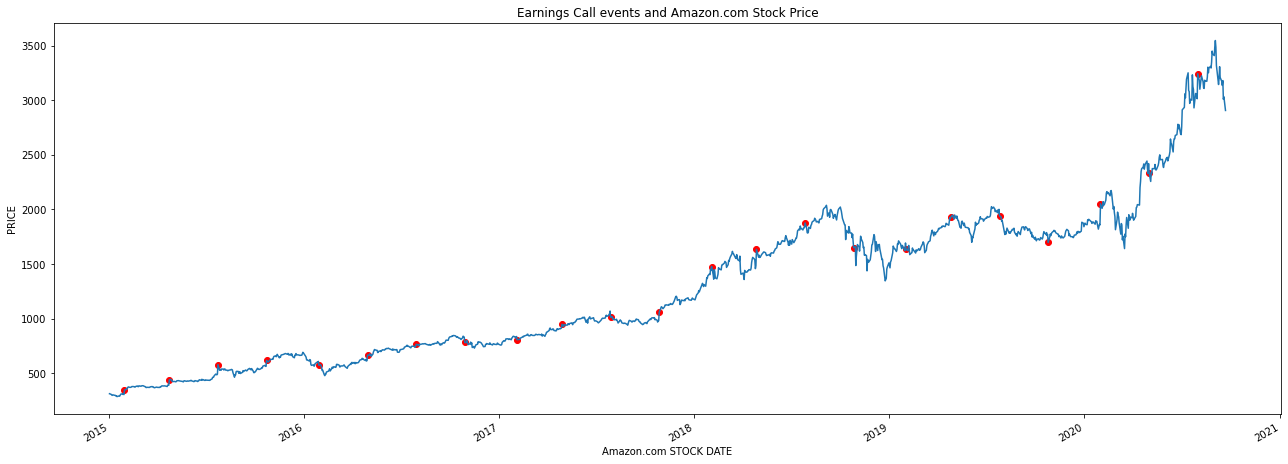

In [27]:
def plot_price_and_text(stock_data, transcript_data):
    '''
    Plots the dates of a company's earning calls on top of a chart of the company's stock price.
    '''
    # Plot the transcript events below the price, 10% offset from min price 
    fig, ax = plt.subplots(figsize=(22,8))
    ax.scatter(transcript_data['focused_date'], transcript_data['focused_price'], color='red')
    ax.plot(stock_data['Date'], stock_data['Open'])
    fig.autofmt_xdate()
    ax.set_title('Earnings Call events and {} Stock Price'.format(transcript_data.iloc[2, 2][:10]))
    ax.set_xlabel('{} STOCK DATE'.format(transcript_data.iloc[2, 2][:10]))
    ax.set_ylabel('PRICE')
plot_price_and_text(amazon_stock, amazon_transcript)

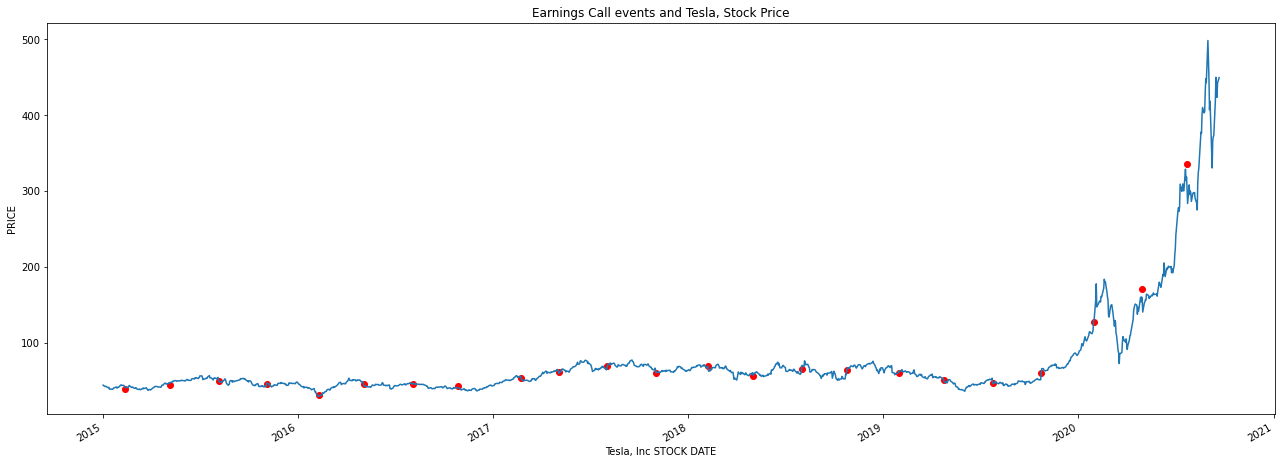

In [28]:
def plot_price_and_text1(stock_data, transcript_data):
    '''
    Plots the dates of a company's earning calls on top of a chart of the company's stock price.
    '''
    # Plot the transcript events below the price, 10% offset from min price 
    fig, ax = plt.subplots(figsize=(22,8))
    ax.scatter(transcript_data['focused_date'], transcript_data['focused_price'], color='red')
    ax.plot(stock_data['Date'], stock_data['Close'])
    fig.autofmt_xdate()
    ax.set_title('Earnings Call events and {} Stock Price'.format(transcript_data.iloc[2, 2][:6]))
    ax.set_xlabel('{} STOCK DATE'.format(transcript_data.iloc[2, 2][:10]))
    ax.set_ylabel('PRICE')
plot_price_and_text1(tesla_stock, tesla_transcript)

In [29]:
blackrock_transcript['word_count']=blackrock_transcript['text'].str.len()
amazon_transcript['word_count'] = amazon_transcript['text'].str.len()
tesla_transcript['word_count'] = tesla_transcript['text'].str.len()

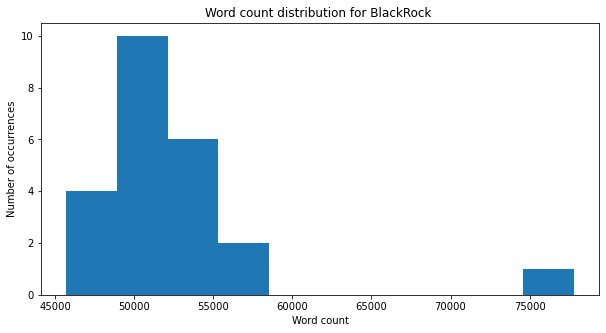

In [30]:
# Plot histogram of word counts for transcripts
def visualize_word_count(transcripts):
    '''
    Plots a histogram of a company's transcript word counts.
    
    Args:
        transcripts: A Pandas DataFrame containing a company's history of earnings calls.
    '''
    
    fig, ax = plt.subplots(figsize=(10,5))
    ax.hist(transcripts['word_count'])
    plt.title("Word count distribution for {}".format(transcripts.iloc[2, 2][:10]))
    ax.set_xlabel('Word count')
    ax.set_ylabel('Number of occurrences')

visualize_word_count(blackrock_transcript)

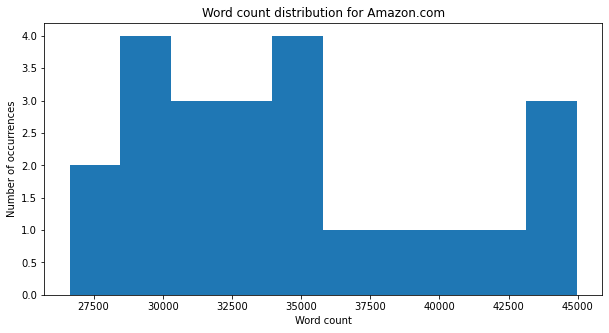

In [31]:
visualize_word_count(amazon_transcript)

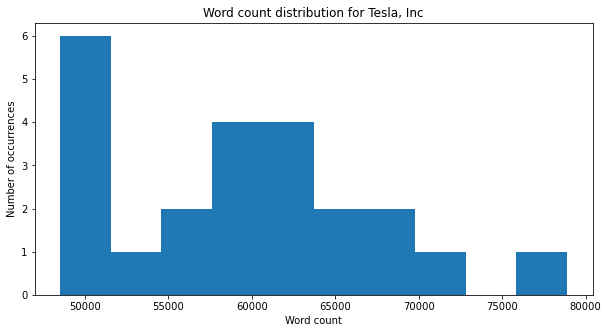

In [32]:
visualize_word_count(tesla_transcript)

In [33]:
documents3 = amazon_transcript['text']
documents1 = blackrock_transcript['text']
documents2 = tesla_transcript['text']
documents = data['text']
#amazon_transcript['text'][17]

In [34]:
stop = set(stopwords.words('english'))

In [35]:
sent_tokens = [sent_tokenize(content) for content in documents]
docs = [word_tokenize(content) for content in documents.str.lower()]
#docs[0]

In [36]:
#tokens for each doc
tokens1 = [sent for sent in map(word_tokenize, sent_tokens[0])]
tokens2 = [sent for sent in map(word_tokenize, sent_tokens[1])]
tokens3 = [sent for sent in map(word_tokenize, sent_tokens[2])]
tokens4 = [sent for sent in map(word_tokenize, sent_tokens[3])]
tokens5 = [sent for sent in map(word_tokenize, sent_tokens[4])]
tokens6 = [sent for sent in map(word_tokenize, sent_tokens[5])]
tokens7 = [sent for sent in map(word_tokenize, sent_tokens[6])]
tokens8 = [sent for sent in map(word_tokenize, sent_tokens[7])]
tokens9 = [sent for sent in map(word_tokenize, sent_tokens[8])]
tokens10 = [sent for sent in map(word_tokenize, sent_tokens[9])]
tokens11 = [sent for sent in map(word_tokenize, sent_tokens[10])]
tokens12 = [sent for sent in map(word_tokenize, sent_tokens[11])]
tokens13 = [sent for sent in map(word_tokenize, sent_tokens[12])]
tokens14 = [sent for sent in map(word_tokenize, sent_tokens[13])]
tokens15 = [sent for sent in map(word_tokenize, sent_tokens[14])]
tokens16 = [sent for sent in map(word_tokenize, sent_tokens[15])]
tokens17 = [sent for sent in map(word_tokenize, sent_tokens[16])]
tokens18 = [sent for sent in map(word_tokenize, sent_tokens[17])]
tokens19 = [sent for sent in map(word_tokenize, sent_tokens[18])]
tokens20 = [sent for sent in map(word_tokenize, sent_tokens[19])]
tokens21 = [sent for sent in map(word_tokenize, sent_tokens[20])]
tokens22 = [sent for sent in map(word_tokenize, sent_tokens[21])]
tokens23 = [sent for sent in map(word_tokenize, sent_tokens[22])]

In [37]:
#list(enumerate(tokens23))

### STOP WORDS

In [38]:
porter = PorterStemmer()
snowball = SnowballStemmer('english')
wordnet = WordNetLemmatizer()
docs_porter = [[porter.stem(word) for word in words] for words in docs]
docs_wordnet = [[wordnet.lemmatize(word) for word in words] for words in docs]

In [39]:
docs_snowball = [[snowball.stem(word) for word in words] for words in docs_wordnet]

In [40]:
for i in range(min(len(docs_porter[0]), len(docs_snowball[0]), len(docs_wordnet[0]))):
    p, s, w = docs_porter[0][i], docs_snowball[0][i], docs_wordnet[0][i]
    if len(set((p, s, w))) != 1:
        print("{}\t{}\t{}\t{}".format(docs[0][i], p, s, w))

conference	confer	confer	conference
eps	ep	ep	eps
revenue	revenu	revenu	revenue
y/y	y/i	y/i	y/y
company	compani	compani	company
participants	particip	particip	participant
chris	chri	chris	chris
meade	mead	mead	meade
general	gener	general	general
larry	larri	larri	larry
executive	execut	execut	executive
officer	offic	offic	officer
gary	gari	gari	gary
financial	financi	financi	financial
officer	offic	offic	officer
operating	oper	oper	operating
officer	offic	offic	officer
solutions	solut	solut	solution
ishares	ishar	ishar	ishares
investments	invest	invest	investment
president	presid	presid	president
conference	confer	confer	conference
participants	particip	particip	participant
cyprys	cypri	cypri	cyprys
siegenthaler	siegenthal	siegenthal	siegenthaler
suisse	suiss	suiss	suisse
autonomous	autonom	autonom	autonomous
jefferies	jefferi	jefferi	jefferies
operator	oper	oper	operator
morning	morn	morn	morning
amy	ami	ami	amy
conference	confer	confer	conference
facilitator	facilit	facilit	facilitat

In [41]:
pos_tagged = [pos_tag(tokens) for tokens in docs]
#pos_tagged

In [42]:
docs = docs_snowball
vocab_set = set()
[[vocab_set.add(token) for token in tokens] for tokens in docs]
vocab = list(vocab_set)
vocab[0]

'sooner'

In [43]:
matrix = [[0] * len(vocab) for doc in docs]
vocab_dict = dict((word, i) for i, word in enumerate(vocab))
for i, words in enumerate(docs):
    for word in words:
        matrix[i][vocab_dict[word]] += 1

In [44]:
cv1 = CountVectorizer(stop_words=['english','yes', 'you', 'your','year','years','youssef','yourself',
                                                   'yeah','would','line','worthington','and','world',
                                                   'worth','working','work','wondering','with','within',
                                                   'willing','will','why','who','which','while','when',
                                                   'where','whether','what','went','were','well',
                                                   'we','were','week','weeks','way','ways','was',
                                                   'welcome','views','view','website'],ngram_range=(2,2),max_df=0.70, min_df=0.12)
cv2 = CountVectorizer(stop_words=['english','yes', 'you', 'your','year','years','youssef','yourself',
                                                   'yeah','would','line','worthington','and','world',
                                                   'worth','working','work','wondering','with','within',
                                                   'willing','will','why','who','which','while','when',
                                                   'where','whether','what','went','were','well',
                                                   'we','were','week','weeks','way','ways','was',
                                                   'welcome','views','view','website'],ngram_range=(2,2),max_df=0.70, min_df=0.12)
cv3 = CountVectorizer(stop_words=['english','yes', 'you', 'your','year','years','youssef','yourself',
                                                   'yeah','would','line','worthington','and','world',
                                                   'worth','working','work','wondering','with','within',
                                                   'willing','will','why','who','which','while','when',
                                                   'where','whether','what','went','were','well',
                                                   'we','were','week','weeks','way','ways','was',
                                                   'welcome','views','view','website'],ngram_range=(2,2),max_df=0.70, min_df=0.12)

tfidf1 = TfidfVectorizer(lowercase=True,stop_words=['english','yes', 'you', 'your','year','years','youssef','yourself',
                                                   'yeah','would','line','worthington','and','world',
                                                   'worth','working','work','wondering','with','within',
                                                   'willing','will','why','who','which','while','when',
                                                   'where','whether','what','went','were','well',
                                                   'we','were','week','weeks','way','ways','was',
                                                   'welcome','views','view','website'],ngram_range=(2,2),max_df=0.70, min_df=0.12)

tfidf2 = TfidfVectorizer(lowercase=True,stop_words=['english','yes', 'you', 'your','year','years','youssef','yourself',
                                                   'yeah','would','line','worthington','and','world',
                                                   'worth','working','work','wondering','with','within',
                                                   'willing','will','why','who','which','while','when',
                                                   'where','whether','what','went','were','well',
                                                   'we','were','week','weeks','way','ways','was',
                                                   'welcome','views','view','website'],ngram_range=(2,2),max_df=0.70, min_df=0.12)

tfidf3 = TfidfVectorizer(lowercase=True,stop_words=['english','yes', 'you', 'your','year','years','youssef','yourself',
                                                   'yeah','would','line','worthington','and','world',
                                                   'worth','working','work','wondering','with','within',
                                                   'willing','will','why','who','which','while','when',
                                                   'where','whether','what','went','were','well',
                                                   'we','were','week','weeks','way','ways','was',
                                                   'welcome','views','view','website'],ngram_range=(2,2),max_df=0.70, min_df=0.12)

In [45]:
cv = CountVectorizer(stop_words=['english','yes', 'you', 'your','year','years','youssef','yourself',
                                                   'yeah','would','line','worthington','and','world',
                                                   'worth','working','work','wondering','with','within',
                                                   'willing','will','why','who','which','while','when',
                                                   'where','whether','what','went','were','well',
                                                   'we','were','week','weeks','way','ways','was',
                                                   'welcome','views','view','website','operator','thank',
                                                   'chief','executive','chairman','the','from','of','officer',
                                                   'co','llc','quarter','morning','reeve','very','we','wants','want','ve',
                                                   'the','operator','that','host','in','always','earnings','talking','or'],ngram_range=(2,2),max_df=0.70, min_df=0.12)
vectorized = cv.fit_transform(documents)
vectorized_blackrock  = cv1.fit_transform(documents1)
vectorized_tesla = cv2.fit_transform(documents2)
vectorized_amazon = cv3.fit_transform(documents3)


tfidf = TfidfVectorizer(lowercase=True,stop_words=['english','yes', 'you', 'your','year','years','youssef','yourself',
                                                   'yeah','would','line','worthington','and','world',
                                                   'worth','working','work','wondering','with','within',
                                                   'willing','will','why','who','which','while','when',
                                                   'where','whether','what','went','were','well',
                                                   'we','were','week','weeks','way','ways','was',
                                                   'welcome','views','view','website','operator','thank',
                                                   'chief','executive','chairman','the','from','of','officer',
                                                   'co','llc','quarter','morning','reeve','very','we','wants','want','ve',
                                                   'the','operator','that','host','in','always','earnings','talking','or'],ngram_range=(2,2),max_df=0.70, min_df=0.12)
tfidfed = tfidf.fit_transform(documents)

In [46]:
tfidfed_blackrock = tfidf1.fit_transform(documents1)

In [47]:
tfidfed_tesla = tfidf2.fit_transform(documents2)

In [48]:
tfidfed_amazon = tfidf3.fit_transform(documents3)

In [49]:
total_dict = cv.vocabulary_
max(total_dict.values())

5262

In [50]:
#!conda install yellowbrick -y

/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


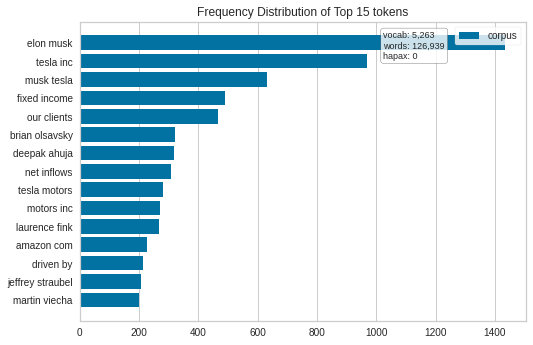

In [51]:
from yellowbrick.text import FreqDistVisualizer

features = cv.get_feature_names()

visualizer = FreqDistVisualizer(n=15,features=features, orient='h')
visualizer.fit(vectorized)
visualizer.show()


In [52]:
#print(sorted(tfidfed.vocabulary_))
tfidf.get_feature_names()[0]

'00 pm'

In [53]:
cv.get_feature_names()[500:535]

['as this',
 'as those',
 'as to',
 'as today',
 'as usual',
 'as whole',
 'ask about',
 'ask question',
 'asked about',
 'asking about',
 'asset allocation',
 'asset class',
 'asset classes',
 'asset flows',
 'asset growth',
 'asset income',
 'asset management',
 'asset manager',
 'asset managers',
 'assets above',
 'assets are',
 'assets to',
 'assets under',
 'assumes among',
 'assumes no',
 'assumptions our',
 'at about',
 'at all',
 'at an',
 'at any',
 'at beginning',
 'at billion',
 'at blackrock',
 'at both',
 'at different']

In [54]:
X = pd.DataFrame(tfidfed.todense(),columns=tfidf.get_feature_names())

In [55]:
X_blackrock = pd.DataFrame(tfidfed_blackrock.todense(),columns=tfidf1.get_feature_names())
X_amazon = pd.DataFrame(tfidfed_amazon.todense(),columns=tfidf3.get_feature_names())
X_tesla = pd.DataFrame(tfidfed_tesla.todense(),columns=tfidf2.get_feature_names())

In [56]:
tfidfed_blackrock

<23x9233 sparse matrix of type '<class 'numpy.float64'>'
	with 50182 stored elements in Compressed Sparse Row format>

In [57]:
X

,00 pm,000 cars,000 model,000 per,000 to,000 unit,000 units,000 vehicles,10 000,10 billion,...,webcast joined,webcast our,whole foods,whole lot,wide range,wolfe research,wonder if,wonderful day,worried about,zev credits
0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064737,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.0,0.081780,0.0,0.000000,0.011049,0.012844,0.000000,0.030728,0.029329,0.000000,...,0.009560,0.0,0.0,0.013310,0.0,0.0,0.0,0.000000,0.000000,0.012844
62,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.059156,0.019719,0.000000,0.000000,...,0.009203,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.011957,0.037090
63,0.0,0.032105,0.0,0.000000,0.000000,0.011765,0.084442,0.028147,0.008955,0.000000,...,0.008757,0.0,0.0,0.000000,0.0,0.0,0.0,0.010401,0.000000,0.000000
64,0.0,0.000000,0.0,0.010622,0.000000,0.000000,0.000000,0.008471,0.008085,0.000000,...,0.007906,0.0,0.0,0.011008,0.0,0.0,0.0,0.009390,0.000000,0.084976


In [58]:
#df = pd.DataFrame(X.T.todense(), index=tfidf.get_feature_names(), columns=["tfidf"])
#df.sort_values(by=["tfidf"],ascending=False).head(n=100)

In [59]:
tfidfed.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.03210511, 0.        , ..., 0.01040126, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.00939048, 0.        ,
         0.08497601],
        [0.        , 0.03414263, 0.        , ..., 0.        , 0.01210111,
         0.01251202]])

In [60]:
#!conda install wordcloud -y

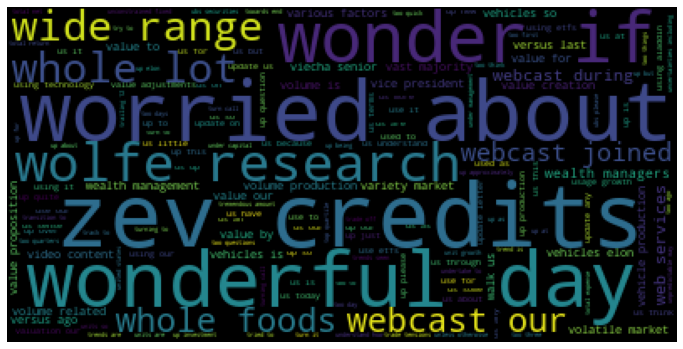

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))
wordcloud = WordCloud().generate_from_frequencies(tfidf.vocabulary_)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [62]:
from PIL import Image

In [63]:
#!conda install textblob -y
#!conda install textacy -y
#!pip install textacy
#!conda install -c conda-forge spacy -y
#!python -m spacy download en_core_web_sm
#!pip3 install spacy
#!python3 -m spacy download en_core_web_sm


In [64]:
#Gives error
#nlp = spacy.load("en_core_web_sm")

In [65]:
!pip install textblob

In [66]:
documents.shape

(66,)

In [67]:
def sentiment_by_sentence(text, doc_id, default):
    sentiment_df = pd.DataFrame(columns = ["date", "doc_id", "polarity", "subjectivity", "progress"])
    tb = TextBlob(text)
    sent_id = 0
    num_sents = len(tb.sentences)
    for sent in tb.sentences:
        sentiment = sent.sentiment
        sentiment_df.loc[sent_id] = [default, doc_id, sentiment.polarity, sentiment.subjectivity, round((sent_id+1)/num_sents,4)]
        sent_id += 1
    return sentiment_df

In [68]:
#sentiment_by_sentence(documents[0], 0, data['date'][0])

In [69]:
amazon_transcript1=amazon_transcript.iloc[1:].copy()
tesla_transcript1=tesla_transcript.iloc[1:].copy()
blackrock_transcript1=blackrock_transcript.iloc[1:].copy()

In [70]:
data

,date,Quarter,text,focused_date,focused_price,next_focused_date,next_price
1,2020-04-16,Q1,"BlackRock, Inc. (NYSE:BLK) 2020-04-16 Q1 2020 ...",2020-04-17,476.320007,2020-07-16,565.299988
2,2020-01-15,Q4,BlackRock Inc. (NYSE:BLK) 2020-01-15 Q4 2019 E...,2020-01-16,536.909973,2020-04-15,442.48999
3,2019-10-15,Q3,"BlackRock, Inc. (NYSE:BLK) 2019-10-15 Q3 2019 ...",2019-10-16,445.000000,2020-01-14,520.150024
4,2019-07-19,Q2,"BlackRock, Inc. (NYSE:BLK) 2019-07-19 Q2 2019 ...",2019-07-20,476.299988,2019-10-14,432.290009
5,2019-04-16,Q1,"BlackRock, Inc. (NYSE:BLK) 2019-04-16 Q1 2019 ...",2019-04-17,466.980011,2019-07-18,470.859985
...,...,...,...,...,...,...,...
18,2016-02-10,Q4,"Tesla Motors, Inc. (NASDAQ:TSLA) Q4 2015 Earni...",2016-02-11,30.400000,2016-05-04,46.057999
19,2015-11-03,Q3,"Tesla Motors, Inc. (NASDAQ:TSLA) Q3 2015 Earni...",2015-11-04,45.400002,2016-02-10,30.1
20,2015-08-05,Q2,"Tesla Motors, Inc. (NASDAQ:TSLA) Q2 2015 Earni...",2015-08-06,49.908001,2015-11-03,42.77
21,2015-05-06,Q1,"Tesla Motors, Inc. (NASDAQ:TSLA) Q1 2015 Earni...",2015-05-07,44.200001,2015-08-05,52.716


In [71]:
data['next_price']=data['next_price'].astype(float)
data['focused_price']=data['focused_price'].astype(float)
amazon_transcript1['next_price']=amazon_transcript1['next_price'].astype(float)
amazon_transcript1['focused_price']=amazon_transcript1['focused_price'].astype(float)
tesla_transcript1['next_price']=tesla_transcript1['next_price'].astype(float)
tesla_transcript1['focused_price']=tesla_transcript1['focused_price'].astype(float)
blackrock_transcript1['next_price']=blackrock_transcript1['next_price'].astype(float)
blackrock_transcript1['focused_price']=blackrock_transcript1['focused_price'].astype(float)

In [72]:
amazon_transcript['date'][0]

Timestamp('2020-07-30 00:00:00')

In [73]:
print(data.shape,X.shape)

(66, 7) (66, 5263)


In [74]:
data

,date,Quarter,text,focused_date,focused_price,next_focused_date,next_price
1,2020-04-16,Q1,"BlackRock, Inc. (NYSE:BLK) 2020-04-16 Q1 2020 ...",2020-04-17,476.320007,2020-07-16,565.299988
2,2020-01-15,Q4,BlackRock Inc. (NYSE:BLK) 2020-01-15 Q4 2019 E...,2020-01-16,536.909973,2020-04-15,442.489990
3,2019-10-15,Q3,"BlackRock, Inc. (NYSE:BLK) 2019-10-15 Q3 2019 ...",2019-10-16,445.000000,2020-01-14,520.150024
4,2019-07-19,Q2,"BlackRock, Inc. (NYSE:BLK) 2019-07-19 Q2 2019 ...",2019-07-20,476.299988,2019-10-14,432.290009
5,2019-04-16,Q1,"BlackRock, Inc. (NYSE:BLK) 2019-04-16 Q1 2019 ...",2019-04-17,466.980011,2019-07-18,470.859985
...,...,...,...,...,...,...,...
18,2016-02-10,Q4,"Tesla Motors, Inc. (NASDAQ:TSLA) Q4 2015 Earni...",2016-02-11,30.400000,2016-05-04,46.057999
19,2015-11-03,Q3,"Tesla Motors, Inc. (NASDAQ:TSLA) Q3 2015 Earni...",2015-11-04,45.400002,2016-02-10,30.100000
20,2015-08-05,Q2,"Tesla Motors, Inc. (NASDAQ:TSLA) Q2 2015 Earni...",2015-08-06,49.908001,2015-11-03,42.770000
21,2015-05-06,Q1,"Tesla Motors, Inc. (NASDAQ:TSLA) Q1 2015 Earni...",2015-05-07,44.200001,2015-08-05,52.716000


In [75]:
data.reset_index(inplace = True)

In [76]:
data=pd.concat([data,X],axis=1)
amazon_transcript=pd.concat([amazon_transcript1,X_amazon],axis=1)
tesla_transcript=pd.concat([tesla_transcript1,X_tesla],axis=1)
blackrock_transcript=pd.concat([blackrock_transcript1,X_blackrock],axis=1)

In [77]:
data['target']=((data['next_price'])-(data['focused_price']))/(data['focused_price'])
data['target']

0     0.186807
1    -0.175858
2     0.168876
3    -0.092400
4     0.008309
        ...   
61    0.515066
62   -0.337004
63   -0.143023
64    0.192670
65    0.209382
Name: target, Length: 66, dtype: float64

In [78]:
tesla_transcript['target']=((tesla_transcript['next_price'])-(tesla_transcript['focused_price']))/(tesla_transcript['focused_price'])
tesla_transcript['target']
blackrock_transcript['target']=((blackrock_transcript['next_price'])-(blackrock_transcript['focused_price']))/(blackrock_transcript['focused_price'])
blackrock_transcript['target']
amazon_transcript['target']=((amazon_transcript['next_price'])-(amazon_transcript['focused_price']))/(amazon_transcript['focused_price'])
amazon_transcript['target']

0          NaN
1     0.297069
2     0.135776
3     0.098053
4    -0.093048
5     0.020892
6     0.177023
7    -0.016119
8    -0.054556
9     0.119516
10   -0.013125
11    0.371558
12   -0.033731
13    0.099459
14    0.128396
15    0.060371
16    0.088575
17    0.108063
18    0.069618
19   -0.071396
20   -0.026114
21    0.107039
22    0.131641
Name: target, dtype: float64

In [79]:
tesla_transcript

,date,Quarter,text,focused_date,focused_price,next_focused_date,next_price,word_count,00 pm,000 000,...,wrong but,yet again,yet but,yet so,yourselves to,zachary kirkhorn,zev credit,zev credits,zev states,target
0,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,0.016640,0.000000,0.000000,0.000000,0.144604,0.000000,0.000000,0.000000,NaN
1,2020-04-29,Q1,"Tesla, Inc. (NASDAQ:TSLA) Q1 2020 Earnings Con...",2020-04-30,171.037994,2020-07-22,319.799988,48522.0,0.000000,0.000000,...,0.000000,0.034365,0.000000,0.018675,0.000000,0.298631,0.000000,0.000000,0.000000,0.869760
2,2020-01-29,Q4,"Tesla, Inc. (NASDAQ:TSLA) Q4 2019 Earnings Con...",2020-01-30,126.484001,2020-04-29,158.033997,50176.0,0.014629,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.314733,0.000000,0.000000,0.000000,0.249439
3,2019-10-23,Q3,"Tesla, Inc. (NASDAQ:TSLA) Q3 2019 Earnings Con...",2019-10-24,59.674000,2020-01-29,115.138000,51316.0,0.014317,0.000000,...,0.000000,0.030821,0.000000,0.000000,0.000000,0.388359,0.000000,0.000000,0.000000,0.929450
4,2019-07-24,Q2,"Tesla, Inc. (NASDAQ:TSLA) Q2 2019 Earnings Con...",2019-07-25,46.700001,2019-10-23,50.900002,50339.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.017174,0.000000,0.219701,0.015801,0.011537,0.000000,0.089936
5,2019-04-24,Q1,"Tesla, Inc (NASDAQ:TSLA) Q1 2019 Earnings Conf...",2019-04-25,51.000000,2019-07-24,51.834000,49360.0,0.000000,0.000000,...,0.000000,0.017815,0.000000,0.000000,0.000000,0.154812,0.000000,0.000000,0.000000,0.016353
6,2019-01-30,Q4,"Tesla, Inc. (NASDAQ:TSLA) Q4 2018 Earnings Con...",2019-01-31,60.200001,2019-04-24,52.770000,52656.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.123422
7,2018-10-24,Q3,Tesla Inc. (NASDAQ:TSLA) Q3 2018 Earnings Conf...,2018-10-25,63.444000,2019-01-30,60.090000,59983.0,0.013843,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.052866
8,2018-08-01,Q2,"Tesla, Inc. (NASDAQ:TSLA) Q2 2018 Earnings Cal...",2018-08-02,65.688004,2018-10-24,60.209999,78887.0,0.004914,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.083394
9,2018-05-02,Q1,"Tesla, Inc. (NASDAQ:TSLA) Q1 2018 Earnings Cal...",2018-05-03,55.757999,2018-08-01,59.598000,62751.0,0.000000,0.007606,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068869


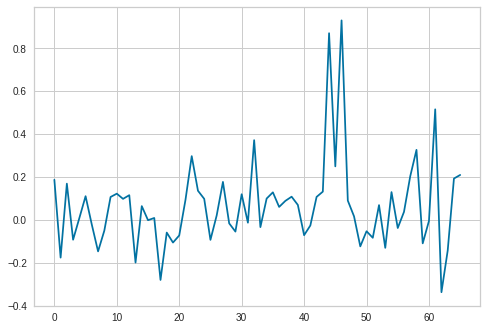

In [80]:
plt.plot(data.index,data['target'])
plt.show()

In [81]:
data['target_class'] = data['target'].apply(lambda x: 1 if x > 0.0 else 0)

In [82]:
data

,index,date,Quarter,text,focused_date,focused_price,next_focused_date,next_price,00 pm,000 cars,...,whole foods,whole lot,wide range,wolfe research,wonder if,wonderful day,worried about,zev credits,target,target_class
0,1,2020-04-16,Q1,"BlackRock, Inc. (NYSE:BLK) 2020-04-16 Q1 2020 ...",2020-04-17,476.320007,2020-07-16,565.299988,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.186807,1
1,2,2020-01-15,Q4,BlackRock Inc. (NYSE:BLK) 2020-01-15 Q4 2019 E...,2020-01-16,536.909973,2020-04-15,442.489990,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-0.175858,0
2,3,2019-10-15,Q3,"BlackRock, Inc. (NYSE:BLK) 2019-10-15 Q3 2019 ...",2019-10-16,445.000000,2020-01-14,520.150024,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.168876,1
3,4,2019-07-19,Q2,"BlackRock, Inc. (NYSE:BLK) 2019-07-19 Q2 2019 ...",2019-07-20,476.299988,2019-10-14,432.290009,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-0.092400,0
4,5,2019-04-16,Q1,"BlackRock, Inc. (NYSE:BLK) 2019-04-16 Q1 2019 ...",2019-04-17,466.980011,2019-07-18,470.859985,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.008309,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,18,2016-02-10,Q4,"Tesla Motors, Inc. (NASDAQ:TSLA) Q4 2015 Earni...",2016-02-11,30.400000,2016-05-04,46.057999,0.0,0.081780,...,0.0,0.013310,0.0,0.0,0.0,0.000000,0.000000,0.012844,0.515066,1
62,19,2015-11-03,Q3,"Tesla Motors, Inc. (NASDAQ:TSLA) Q3 2015 Earni...",2015-11-04,45.400002,2016-02-10,30.100000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.011957,0.037090,-0.337004,0
63,20,2015-08-05,Q2,"Tesla Motors, Inc. (NASDAQ:TSLA) Q2 2015 Earni...",2015-08-06,49.908001,2015-11-03,42.770000,0.0,0.032105,...,0.0,0.000000,0.0,0.0,0.0,0.010401,0.000000,0.000000,-0.143023,0
64,21,2015-05-06,Q1,"Tesla Motors, Inc. (NASDAQ:TSLA) Q1 2015 Earni...",2015-05-07,44.200001,2015-08-05,52.716000,0.0,0.000000,...,0.0,0.011008,0.0,0.0,0.0,0.009390,0.000000,0.084976,0.192670,1


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import r2_score, mean_squared_error

In [84]:
data1 = data.copy()

In [85]:
y=data1.pop('target_class')
y

0     1
1     0
2     1
3     0
4     1
     ..
61    1
62    0
63    0
64    1
65    1
Name: target_class, Length: 66, dtype: int64

In [86]:
data1.pop('target')

0     0.186807
1    -0.175858
2     0.168876
3    -0.092400
4     0.008309
        ...   
61    0.515066
62   -0.337004
63   -0.143023
64    0.192670
65    0.209382
Name: target, Length: 66, dtype: float64

In [87]:
X = data1

In [88]:
data1.columns

Index(['index', 'date', 'Quarter', 'text', 'focused_date', 'focused_price',
       'next_focused_date', 'next_price', '00 pm', '000 cars',
       ...
       'webcast joined', 'webcast our', 'whole foods', 'whole lot',
       'wide range', 'wolfe research', 'wonder if', 'wonderful day',
       'worried about', 'zev credits'],
      dtype='object', length=5271)

In [89]:
X=data1.iloc[:,9:]

In [90]:
X

,000 cars,000 model,000 per,000 to,000 unit,000 units,000 vehicles,10 000,10 billion,10 subsequent,...,webcast joined,webcast our,whole foods,whole lot,wide range,wolfe research,wonder if,wonderful day,worried about,zev credits
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064737,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.081780,0.0,0.000000,0.011049,0.012844,0.000000,0.030728,0.029329,0.000000,0.0,...,0.009560,0.0,0.0,0.013310,0.0,0.0,0.0,0.000000,0.000000,0.012844
62,0.000000,0.0,0.000000,0.000000,0.000000,0.059156,0.019719,0.000000,0.000000,0.0,...,0.009203,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.011957,0.037090
63,0.032105,0.0,0.000000,0.000000,0.011765,0.084442,0.028147,0.008955,0.000000,0.0,...,0.008757,0.0,0.0,0.000000,0.0,0.0,0.0,0.010401,0.000000,0.000000
64,0.000000,0.0,0.010622,0.000000,0.000000,0.000000,0.008471,0.008085,0.000000,0.0,...,0.007906,0.0,0.0,0.011008,0.0,0.0,0.0,0.009390,0.000000,0.084976


In [91]:
#X.describe()

In [92]:
X

,000 cars,000 model,000 per,000 to,000 unit,000 units,000 vehicles,10 000,10 billion,10 subsequent,...,webcast joined,webcast our,whole foods,whole lot,wide range,wolfe research,wonder if,wonderful day,worried about,zev credits
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064737,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.081780,0.0,0.000000,0.011049,0.012844,0.000000,0.030728,0.029329,0.000000,0.0,...,0.009560,0.0,0.0,0.013310,0.0,0.0,0.0,0.000000,0.000000,0.012844
62,0.000000,0.0,0.000000,0.000000,0.000000,0.059156,0.019719,0.000000,0.000000,0.0,...,0.009203,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.011957,0.037090
63,0.032105,0.0,0.000000,0.000000,0.011765,0.084442,0.028147,0.008955,0.000000,0.0,...,0.008757,0.0,0.0,0.000000,0.0,0.0,0.0,0.010401,0.000000,0.000000
64,0.000000,0.0,0.010622,0.000000,0.000000,0.000000,0.008471,0.008085,0.000000,0.0,...,0.007906,0.0,0.0,0.011008,0.0,0.0,0.0,0.009390,0.000000,0.084976


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [94]:
X_train

,000 cars,000 model,000 per,000 to,000 unit,000 units,000 vehicles,10 000,10 billion,10 subsequent,...,webcast joined,webcast our,whole foods,whole lot,wide range,wolfe research,wonder if,wonderful day,worried about,zev credits
65,0.034143,0.000000,0.000000,0.010764,0.000000,0.000000,0.000000,0.028571,0.000000,0.000000,...,0.009313,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012101,0.012512
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016365,...,0.000000,0.014632,0.111998,0.000000,0.000000,0.000000,0.038465,0.000000,0.000000,0.000000
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012807,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032545,0.000000
22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020034,...,0.000000,0.017912,0.159955,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
41,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.011264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
64,0.000000,0.000000,0.010622,0.000000,0.000000,0.000000,0.008471,0.008085,0.000000,0.000000,...,0.007906,0.000000,0.000000,0.011008,0.000000,0.000000,0.000000,0.009390,0.000000,0.084976
32,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013940,...,0.000000,0.012463,0.476997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018580,0.000000


In [95]:
clf = MultinomialNB()

In [96]:
clf.fit(X_train, y_train)

MultinomialNB()

In [97]:
y_p=clf.predict(X_test)
y_p

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [99]:
mean_squared_error(y_test, y_p)

0.6428571428571429

In [100]:
clf.score(X_test,y_test)

0.35714285714285715

#### RANDOM FOREST Classifier

In [101]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [102]:
ran_clf = RandomForestClassifier(bootstrap= True,
                                 ccp_alpha= 0.0,
                                 class_weight= None,
                                 criterion= 'gini',
                                 max_depth= 5,
                                 max_features= 0.25,
                                 max_leaf_nodes= None,
                                 max_samples= None,
                                 min_impurity_decrease= 0.0,
                                 min_impurity_split= None,
                                 min_samples_leaf= 1,
                                 min_samples_split= 4,
                                 min_weight_fraction_leaf= 0.0,
                                 n_estimators= 50,
                                 n_jobs= None,
                                 oob_score= False,
                                 random_state= 0,
                                 verbose= 0,
                                 warm_start= False)

In [103]:
ran_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=0.25, min_samples_split=4,
                       n_estimators=50, random_state=0)

In [104]:
y_phat=ran_clf.predict(X_test)
y_phat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [105]:
mean_squared_error(y_test, y_phat)

0.5714285714285714

In [106]:
ran_clf.score(X_test,y_test)

0.42857142857142855

In [107]:
precision_score(y_test, y_phat)

0.42857142857142855

In [108]:
recall_score(y_test, y_phat)

1.0

In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_phat)

0.42857142857142855

In [121]:
from sklearn.model_selection import GridSearchCV

par = {
    'n_estimators': [50, 150, 250],
    'max_features': ['sqrt', 0.25, 0.5, 0.75],
    'min_samples_split': [2, 4, 6],
    'max_depth' : [5,10,20],
    'bootstrap' : [True, False]
}

gri_check = GridSearchCV(ran_clf, par, cv=2)

In [122]:
check_che = gri_check.fit(X, y)

In [123]:
# print winning set of hyperparameters
from pprint import pprint
pprint(check_che.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 0.25,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [110]:
importances = ran_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in ran_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 2022 (0.027237)
2. feature 394 (0.025839)
3. feature 2932 (0.021925)
4. feature 332 (0.020776)
5. feature 2369 (0.018788)
6. feature 2605 (0.017839)
7. feature 135 (0.016643)
8. feature 3814 (0.016587)
9. feature 661 (0.015855)
10. feature 4979 (0.015000)
11. feature 112 (0.014800)
12. feature 3603 (0.014517)
13. feature 4661 (0.014089)
14. feature 2729 (0.013953)
15. feature 4078 (0.013829)
16. feature 2564 (0.013105)
17. feature 511 (0.012131)
18. feature 915 (0.011596)
19. feature 567 (0.010890)
20. feature 886 (0.010213)
21. feature 1350 (0.009841)
22. feature 1546 (0.009804)
23. feature 4230 (0.009723)
24. feature 1626 (0.009600)
25. feature 4980 (0.009471)
26. feature 4955 (0.009291)
27. feature 4219 (0.008995)
28. feature 3615 (0.008863)
29. feature 787 (0.008787)
30. feature 1747 (0.008629)
31. feature 400 (0.008613)
32. feature 166 (0.008596)
33. feature 1358 (0.008541)
34. feature 3 (0.008518)
35. feature 1954 (0.008444)
36. feature 2844 (0.008427)

In [111]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, ran_clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})

In [121]:
importances = importances.sort_values('Gini-importance',ascending=True)
importances=importances.head(10)

<Figure size 576x396 with 0 Axes>

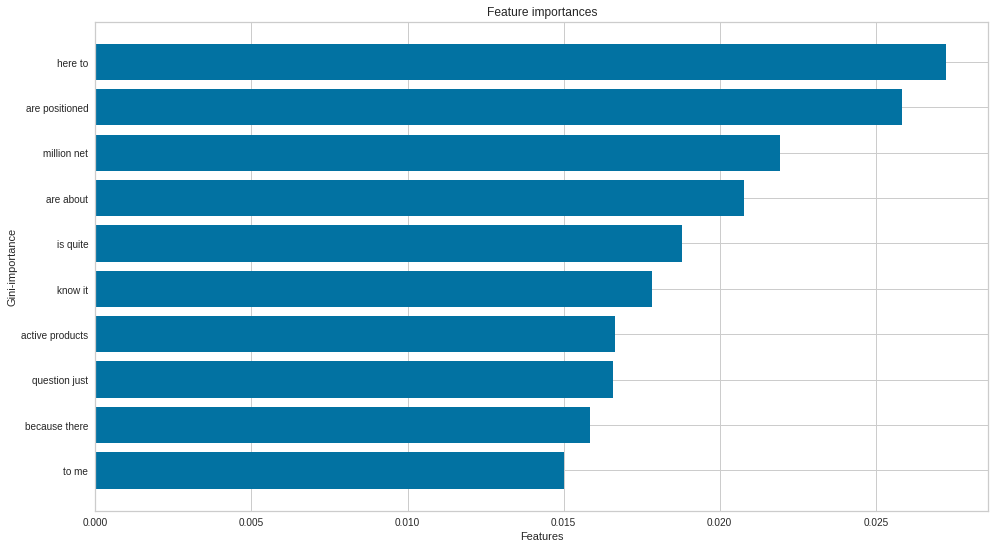

In [122]:
# Plot the impurity-based feature importances of the forest
plt.figure()

# Figure Size 
fig, ax = plt.subplots(figsize =(16, 9)) 
  
# Horizontal Bar Plot 
ax.barh(importances.index, importances['Gini-importance']) 
plt.xlabel("Features") 
plt.ylabel("Gini-importance") 
plt.title("Feature importances") 
plt.show()

In [ ]:
plt.bar(courses, values, color ='blue',  
        width = 0.4) 

In [145]:
x=(visualizer.fit(X, y))

In [147]:
type(x)

yellowbrick.model_selection.importances.FeatureImportances

/opt/conda/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


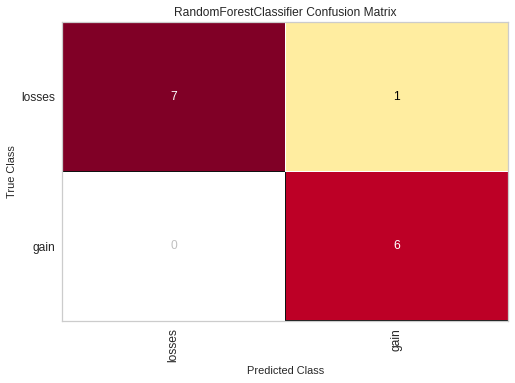

In [144]:
matrix = ConfusionMatrix(ran_clf, classes=['losses', 'gain'])
matrix.fit(X_train, y_train)
matrix.score(X_test, y_test)
matrix.show();

### RANDOM FOREST

In [185]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [190]:
data2 = data.copy()

In [191]:
y1=data2.pop('target')

In [192]:
data2.pop('target_class')

0     1
1     0
2     1
3     0
4     1
     ..
61    1
62    0
63    0
64    1
65    1
Name: target_class, Length: 66, dtype: int64

In [193]:
X_train, X_test, y_train1, y_test1 = train_test_split(X, y1, test_size=0.3, random_state=0)

In [194]:
regr = RandomForestRegressor(bootstrap = True,
                             ccp_alpha = 0.0,
                             criterion = 'mse',
                             max_depth = 5,
                             max_features = 'sqrt',
                             max_leaf_nodes = None,
                             max_samples = None,
                             min_impurity_decrease = 0.0,
                             min_impurity_split = None,
                             min_samples_leaf = 1,
                             min_samples_split = 4,
                             min_weight_fraction_leaf = 0.0,
                             n_estimators = 50,
                             n_jobs = None,
                             oob_score = False,
                             random_state = 0,
                             verbose = 0,
                             warm_start = False)

In [195]:
regr.fit(X_train,y_train1)

RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_split=4,
                      n_estimators=50, random_state=0)

In [196]:
y_hat=regr.predict(X_test)

In [197]:
y_hat

array([ 0.05097119,  0.05689216,  0.10135909,  0.1099433 ,  0.06993684,
        0.11351882,  0.05231946,  0.11597619,  0.12480095, -0.02146147,
        0.14257912,  0.06965348,  0.08935992,  0.09859676,  0.128104  ,
       -0.04996075, -0.02006791,  0.12008207,  0.02834128,  0.10467821])

In [198]:
mean_squared_error(y_test1, y_hat)

0.049510567171190165

In [199]:
r2_score(y_test,y_hat)

0.001884543637920344

In [200]:
from sklearn.model_selection import KFold

In [201]:
kf = KFold(n_splits=5)

In [202]:
scores = []
for X_ktrain, X_ktest in kf.split(X):
    regr.fit(X.values[X_ktrain], y.values[X_ktrain])
    ## evaluate the model on testing data!!!
    scores.append(regr.score(X.values[X_ktest], y.values[X_ktest]))
print(np.mean(scores))

-0.15220845531613456


In [203]:
scores

[-0.5148118969929196,
 0.11346338614890716,
 -0.10288915110259977,
 -0.11101538109376552,
 -0.14578923354029505]

In [149]:
from sklearn.model_selection import GridSearchCV

par = {
    'n_estimators': [50, 150, 250],
    'max_features': ['sqrt', 0.25, 0.5, 0.75],
    'min_samples_split': [2, 4, 6],
    'max_depth' : [5,10,20],
    'bootstrap' : [True, False]
}

grid_check = GridSearchCV(regr, par, cv=2)

In [210]:
check_check = grid_check.fit(X, y)

In [211]:
# print winning set of hyperparameters
from pprint import pprint
pprint(check_check.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


#### GRADIENT BOOSTER

In [204]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [205]:
X_train, X_test, y_train1, y_test1 = train_test_split(X, y1, random_state=0)

In [206]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train,y_train1)

GradientBoostingRegressor(random_state=0)

In [207]:
y_pred=reg.predict(X_test)

In [208]:
mean_squared_error(y_test1,y_pred)

0.07535545543831487

In [209]:
r2_score(y_test1,y_pred)

-0.5191392280788121

In [291]:
print(type(docs),type(documents))

<class 'list'> <class 'pandas.core.series.Series'>


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
clf = GradientBoostingClassifier(random_state=0)

In [313]:
docsx

,0
0,"[blackrock, ,, inc., (, nyse, :, blk, ), 2020-..."
1,"[blackrock, inc., (, nyse, :, blk, ), 2020-01-..."
2,"[blackrock, ,, inc., (, nyse, :, blk, ), 2019-..."
3,"[blackrock, ,, inc., (, nyse, :, blk, ), 2019-..."
4,"[blackrock, ,, inc., (, nyse, :, blk, ), 2019-..."
...,...
61,"[tesla, motors, ,, inc., (, nasdaq, :, tsla, )..."
62,"[tesla, motors, ,, inc., (, nasdaq, :, tsla, )..."
63,"[tesla, motors, ,, inc., (, nasdaq, :, tsla, )..."
64,"[tesla, motors, ,, inc., (, nasdaq, :, tsla, )..."


In [490]:
documents.shape

(66,)

### SENTIMENT ANALYSIS

In [124]:
# TextBlob Sentiment Analysis
from textblob import TextBlob

desc_blob = [TextBlob(desc) for desc in data['text']]
data['sentiment'] = [a.sentiment for a in desc_blob]
data['polarity'] = [b.polarity for b in desc_blob]
data['subjectivity'] = [c.subjectivity for c in desc_blob]


In [126]:
d_blob = [TextBlob(d) for d in blackrock_transcript['text']]
blackrock_transcript['polarity'] = [b.polarity for b in d_blob]
blackrock_transcript['subjectivity'] = [c.subjectivity for c in d_blob]

TypeError: The `text` argument passed to `__init__(text)` must be a string, not <class 'float'>

In [ ]:
desc_blob = [TextBlob(desc) for desc in amazon_transcript['text']]
amazon_transcript['polarity'] = [b.polarity for b in desc_blob]
amazon_transcript['subjectivity'] = [c.subjectivity for c in desc_blob]

In [ ]:
desc_blob = [TextBlob(desc) for desc in tesla_transcript['text']]
tesla_transcript['polarity'] = [b.polarity for b in desc_blob]
tesla_transcript['subjectivity'] = [c.subjectivity for c in desc_blob]

In [127]:
data

,index,date,Quarter,text,focused_date,focused_price,next_focused_date,next_price,00 pm,000 cars,...,wolfe research,wonder if,wonderful day,worried about,zev credits,target,target_class,sentiment,polarity,subjectivity
0,1,2020-04-16,Q1,"BlackRock, Inc. (NYSE:BLK) 2020-04-16 Q1 2020 ...",2020-04-17,476.320007,2020-07-16,565.299988,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.186807,1,"(0.15808925938103127, 0.4454342489905779)",0.158089,0.445434
1,2,2020-01-15,Q4,BlackRock Inc. (NYSE:BLK) 2020-01-15 Q4 2019 E...,2020-01-16,536.909973,2020-04-15,442.489990,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,-0.175858,0,"(0.1618134858436581, 0.44865595167011374)",0.161813,0.448656
2,3,2019-10-15,Q3,"BlackRock, Inc. (NYSE:BLK) 2019-10-15 Q3 2019 ...",2019-10-16,445.000000,2020-01-14,520.150024,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.168876,1,"(0.15199399864300528, 0.41437946637615514)",0.151994,0.414379
3,4,2019-07-19,Q2,"BlackRock, Inc. (NYSE:BLK) 2019-07-19 Q2 2019 ...",2019-07-20,476.299988,2019-10-14,432.290009,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,-0.092400,0,"(0.1555341699947508, 0.4070853466496611)",0.155534,0.407085
4,5,2019-04-16,Q1,"BlackRock, Inc. (NYSE:BLK) 2019-04-16 Q1 2019 ...",2019-04-17,466.980011,2019-07-18,470.859985,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.008309,1,"(0.13868432539682554, 0.421402403499278)",0.138684,0.421402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,18,2016-02-10,Q4,"Tesla Motors, Inc. (NASDAQ:TSLA) Q4 2015 Earni...",2016-02-11,30.400000,2016-05-04,46.057999,0.0,0.081780,...,0.0,0.0,0.000000,0.000000,0.012844,0.515066,1,"(0.15665118751858512, 0.44712431746828524)",0.156651,0.447124
62,19,2015-11-03,Q3,"Tesla Motors, Inc. (NASDAQ:TSLA) Q3 2015 Earni...",2015-11-04,45.400002,2016-02-10,30.100000,0.0,0.000000,...,0.0,0.0,0.000000,0.011957,0.037090,-0.337004,0,"(0.13096988261900536, 0.43782862913564674)",0.130970,0.437829
63,20,2015-08-05,Q2,"Tesla Motors, Inc. (NASDAQ:TSLA) Q2 2015 Earni...",2015-08-06,49.908001,2015-11-03,42.770000,0.0,0.032105,...,0.0,0.0,0.010401,0.000000,0.000000,-0.143023,0,"(0.15617122167855055, 0.45505879016628153)",0.156171,0.455059
64,21,2015-05-06,Q1,"Tesla Motors, Inc. (NASDAQ:TSLA) Q1 2015 Earni...",2015-05-07,44.200001,2015-08-05,52.716000,0.0,0.000000,...,0.0,0.0,0.009390,0.000000,0.084976,0.192670,1,"(0.13994562096286225, 0.4559858998824516)",0.139946,0.455986


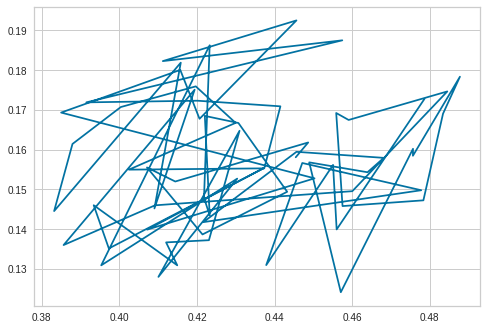

In [128]:
import matplotlib.pyplot as plt
polarity = data['polarity']
subjectivity = data['subjectivity']

plt.plot(subjectivity, polarity)

In [129]:
data[['polarity','target','target_class','subjectivity']].corr()

,polarity,target,target_class,subjectivity
polarity,1.000000,0.151680,0.095225,0.195122
target,0.151680,1.000000,0.643192,0.173607
target_class,0.095225,0.643192,1.000000,-0.032734
subjectivity,0.195122,0.173607,-0.032734,1.000000


In [132]:
blackrock_data=data.head(22)

In [134]:
amazon_data = data.iloc[23:44]

In [135]:
tesla_data = data.iloc[44:]

In [142]:
blackrock_data[blackrock_data['polarity']<0]

,index,date,Quarter,text,focused_date,focused_price,next_focused_date,next_price,00 pm,000 cars,...,wolfe research,wonder if,wonderful day,worried about,zev credits,target,target_class,sentiment,polarity,subjectivity


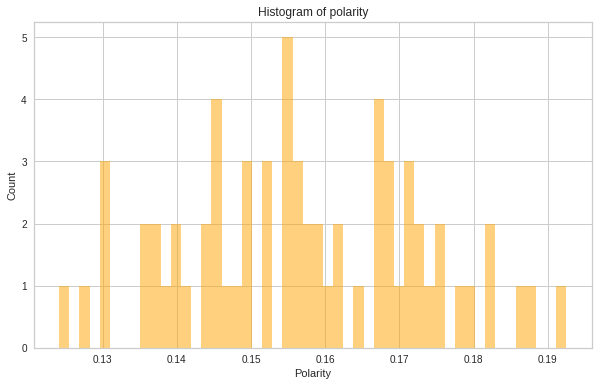

In [146]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(data['polarity'], num_bins, facecolor='orange', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show()